In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('./content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [3]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [4]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [5]:
mobile_sales.DATE.describe()

C:\Users\Upendra\AppData\Local\Temp\ipykernel_27812\20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [6]:
mobile_sales.isna().sum()

DATE      0
Sales    19
dtype: int64

In [7]:
mobile_sales.set_index('DATE', inplace=True)

In [8]:
mobile_sales.index.year.unique()

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='DATE')

<Axes: xlabel='DATE'>

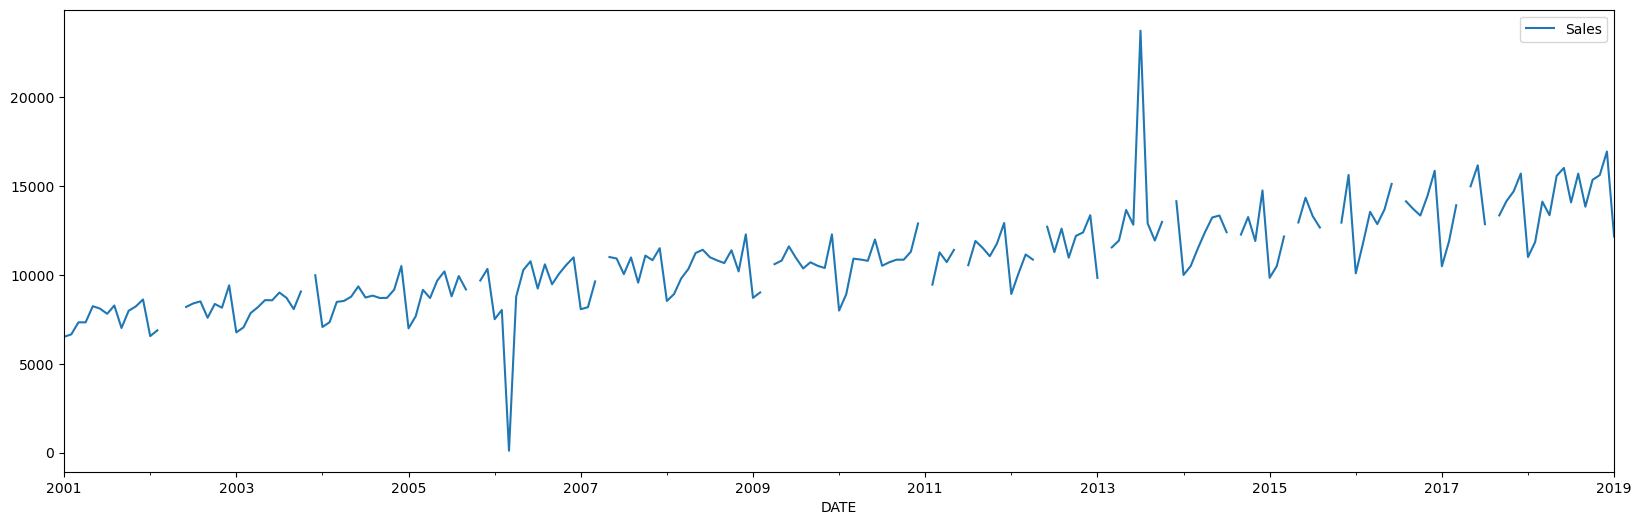

In [9]:
mobile_sales.plot()

## Challenge 1: Handling missing values

We need to
- Find where the values are missing
- Analyze if there is any pattern
- Fill them with the most appropriate value.

<br>

> **Q. How do we find the missing values?**

By now, we already know how to find missing values. We use the `isna()` method to get a sense of how many values are missing.

In [10]:
mobile_sales.Sales.isna().sum()

19

In [11]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


There is no visible pattern.

So we can safely move forward, but if there was a pattern we would have handled that differently.

<br>

> **INTERACTION**
> - Can you suggest some ways to fill missing values? (mean, median, 0, etc)

<br>

### Imputing with Mean/Median
#### Q. How can we go about imputing the missing values?
One basic intuition is to fill these missing values with the **mean** or the **median** of the signal.

Let's look at both these values, and try filling up the missing values with them.

In [12]:
mobile_sales.Sales.mean()

10842.757575757576

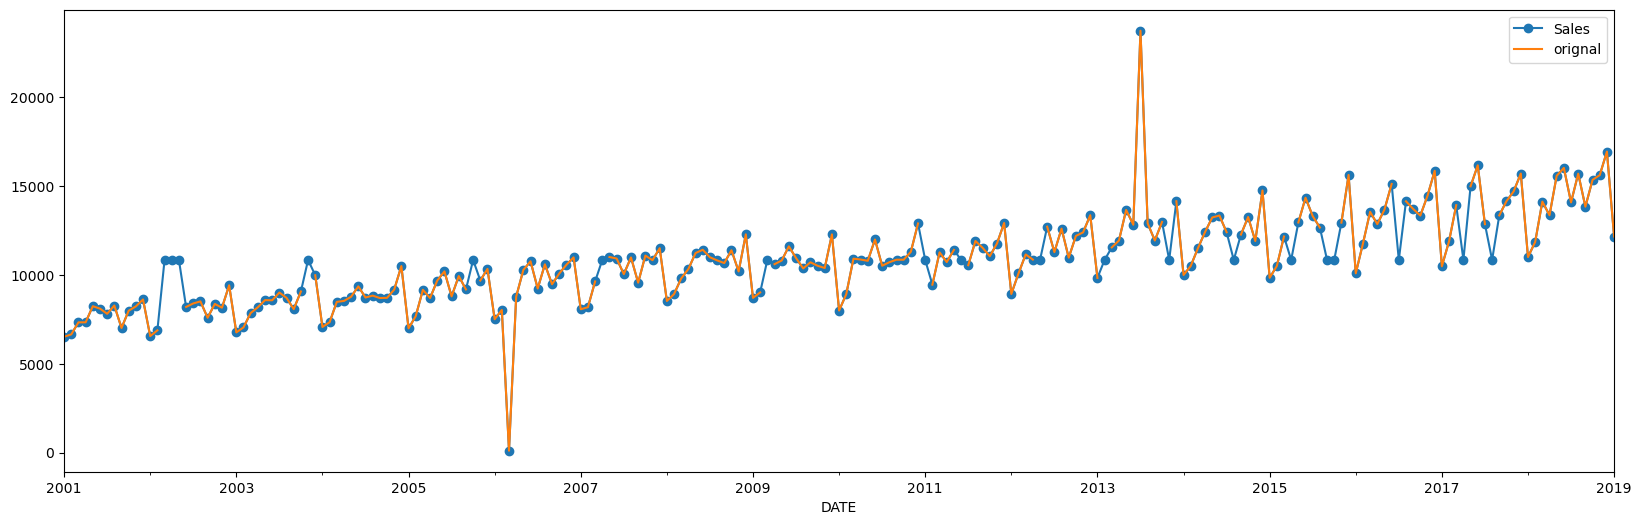

In [13]:
mobile_sales.fillna(mobile_sales.Sales.mean()).plot(label='mean imputed', marker='o')
mobile_sales.Sales.plot(label='orignal')
plt.legend()





> **Q. Looking at the plot above, Do you think the values got imputed correctly?**

**No.**

Look at the plot for the year 2002
- The sales was in the range of 6,000-7,000
- We imputed the missing values with **mean of the entire data** across 18 years, i.e. 10k approx
- You can see how sharply this spike increases, in the plot to accomodate the same.
- Also notice that when the missing values gap ends, the value is in the range of roughly 8,000
- This again, causes a sharp decrease in the plot
- This doesn't feel right, and honestly a little forced.
- Certainly, the sales volume doesn't immediately increase to 10k for the months with missing data and then come back to a smaller scale, right as we get the original data.


**NOTE:** As stated above, even though we're looking at replacing missing values with mean, replacing with median would've also given the same result, as they have a similar value.

<br>


<Axes: xlabel='DATE'>

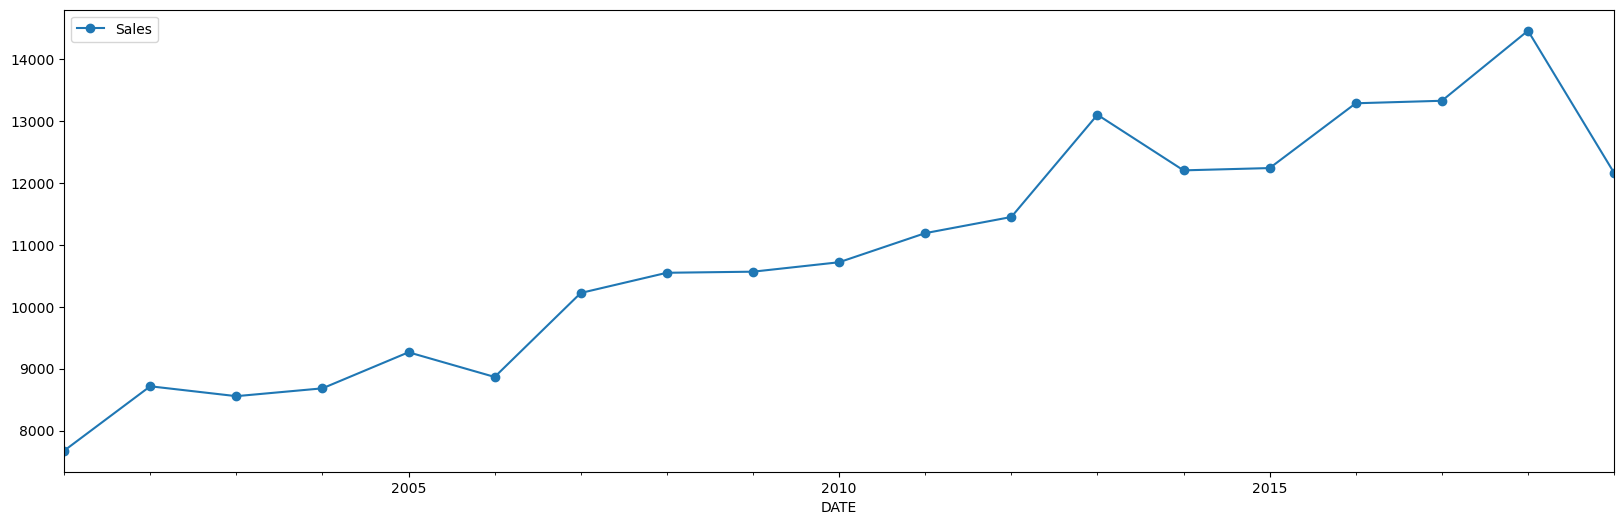

In [14]:
mobile_sales.fillna(mobile_sales.Sales.mean()).resample('Y').mean().plot(marker='o')

### Imputing with 0

> **Q. What if we impute by replacing the missing values with 0?**

**That doesn't make sense for this time series.**

The monthly sales of a mobile phone would not just drop to 0 on random months.

**But in many cases, this works very well.**

A lot of times, time series can be at a daily level, and it can happen that the sales for particular days is 0, owing to the store being closed on public holidays, or Sundays.

In industry, in order to do that, we need to first check in with the client who owns that data, to cross-check first without making assumptions.

This is very common practice.

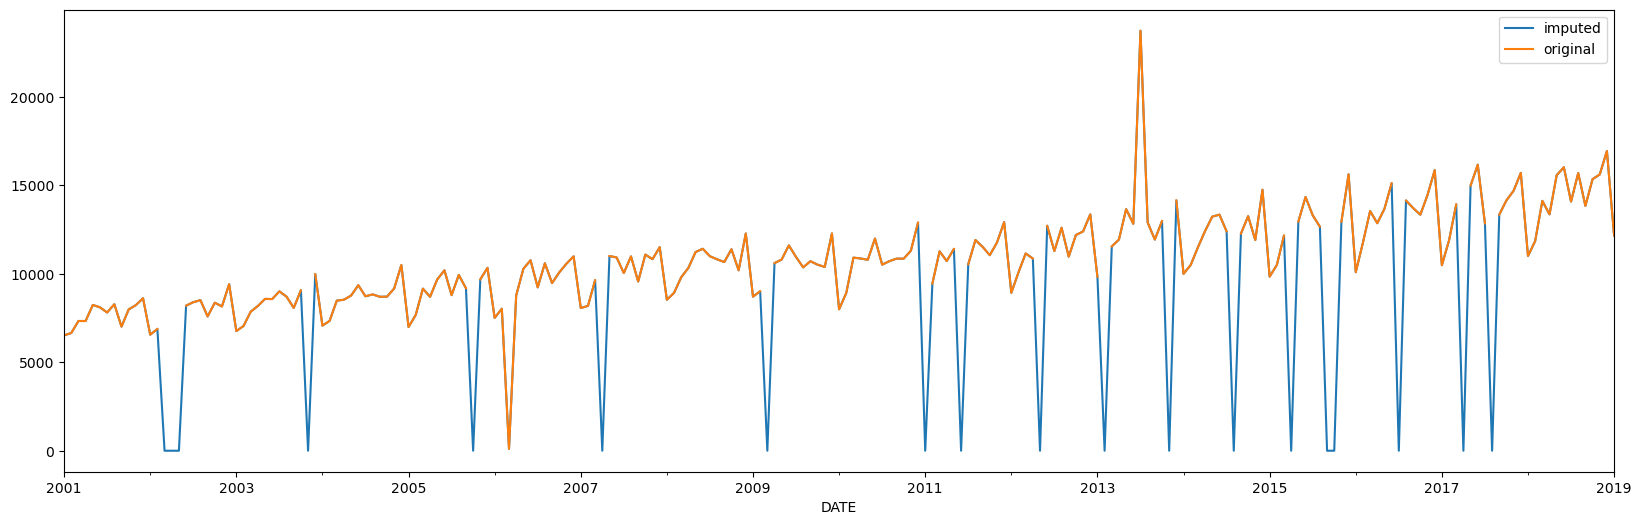

In [15]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

### Interpolation

So, We can't replace with 0 also.

> **Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

This is called **Linear Interpolation**.

Let's apply this now.

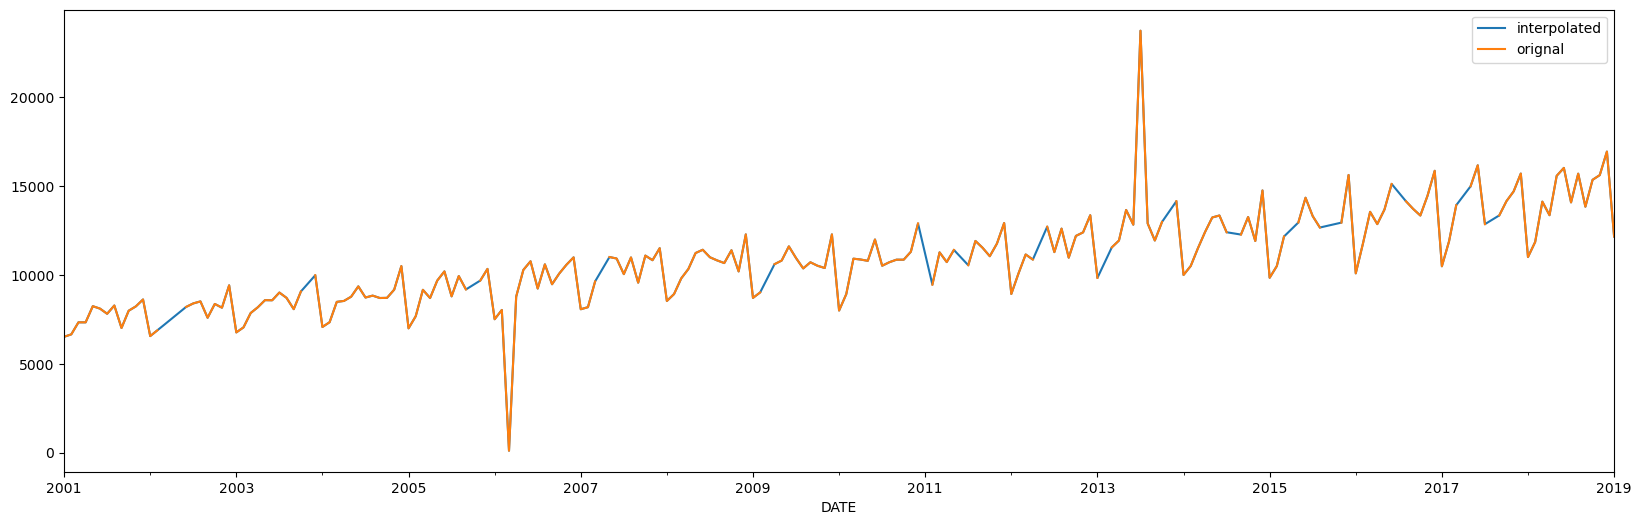

In [16]:
mobile_sales.Sales.interpolate().plot(label='interpolated')
mobile_sales.Sales.plot(label='orignal')
plt.legend()

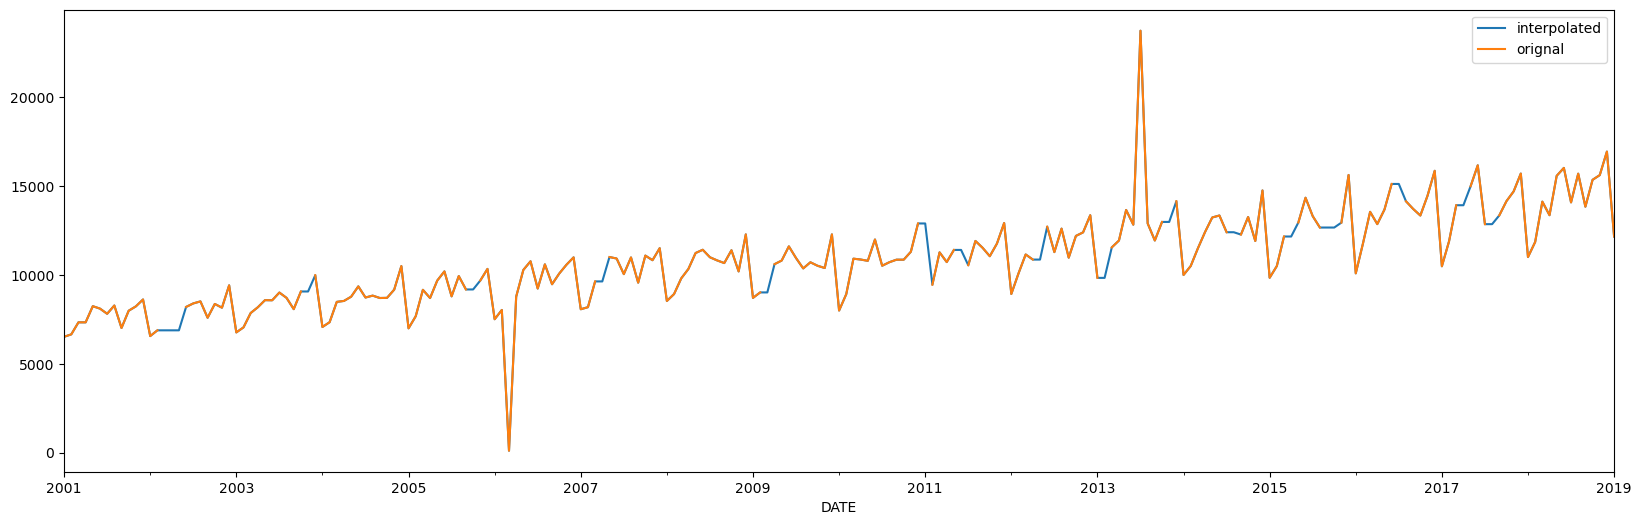

In [17]:
mobile_sales.Sales.interpolate(method='pad').plot(label='interpolated',)
mobile_sales.Sales.plot(label='orignal')
plt.legend()

**handling of missing values** : 
>  finally lets take interpolated values for missing data

In [18]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')


## Challenge 2: Anomalies

Lets look at the other issue in our data

[]

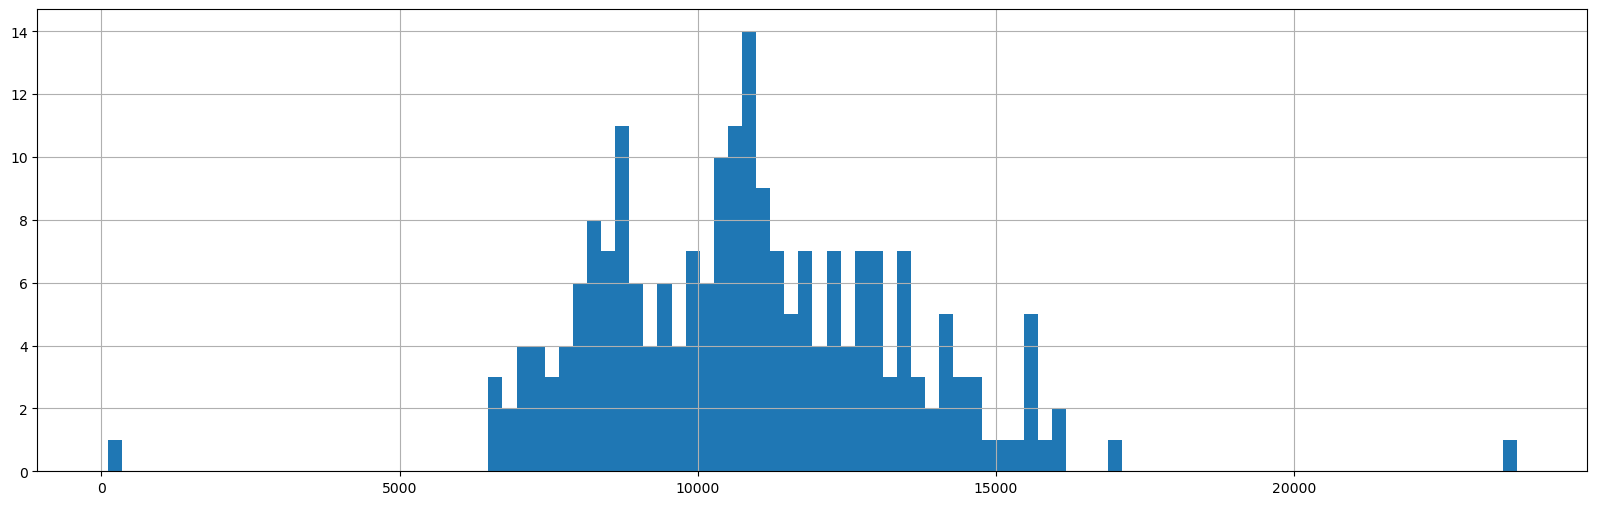

In [19]:
mobile_sales.Sales.hist(bins=100).plot()

From the plot, we can clearly see the anomalies.

We can easily decide where to cut the data, in order to get rid of anomalies.
* For instance, We can replace all the $values < 5000$ by 5000 and all the $values > 20,000$ by 20,000

> **Q. But what would we do if this histogram plot was more continuous?**

Then we would not know where to cut the data.


### quantitiles 

In [20]:
mobile_sales.describe()

,Sales
count,217.000000
mean,10873.046083
std,2571.620954
min,108.000000
25%,8923.000000
50%,10793.000000
75%,12555.500000
max,23740.000000


cliping : 
* How do we determine anomalies using concept of percentile? Generally, we rule out an observation as an anomaly, if it is greater than 95 percentile, or less than 5 percentile.

In [21]:
mobile_sales.Sales.quantile(0.05), mobile_sales.Sales.quantile(0.95)

(7307.8, 15164.599999999997)

<Axes: xlabel='DATE'>

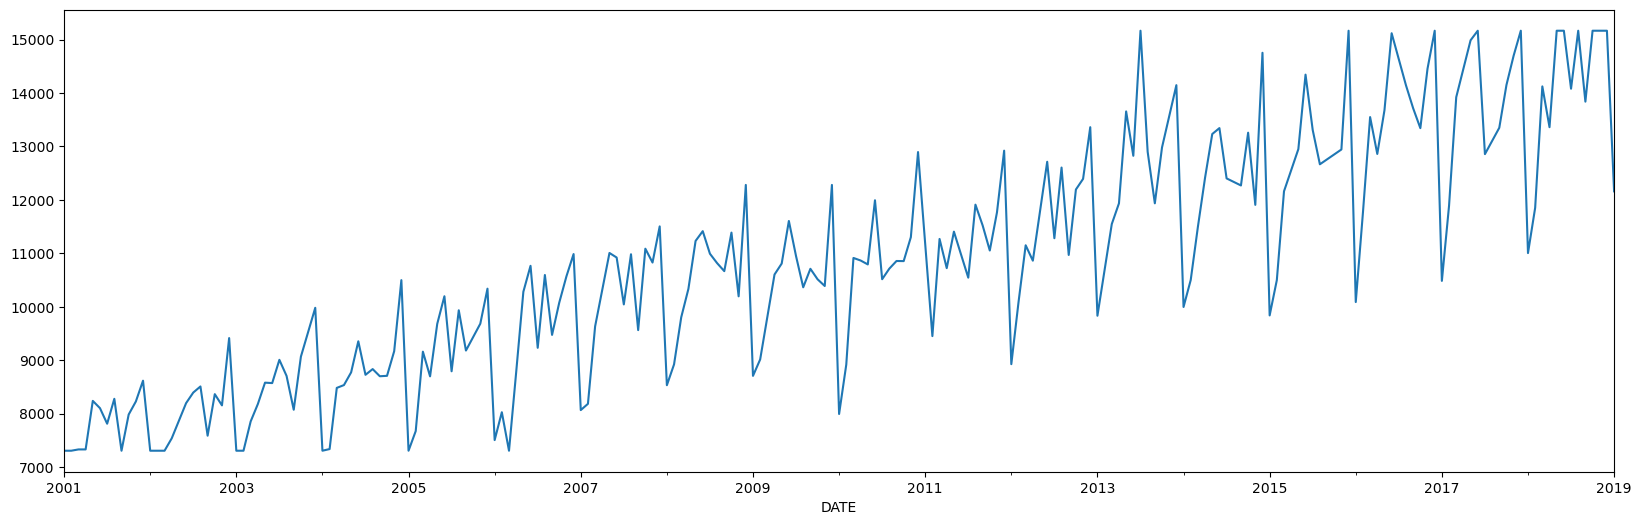

In [22]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

In [23]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

##  Breaking down a time series

<Axes: xlabel='DATE'>

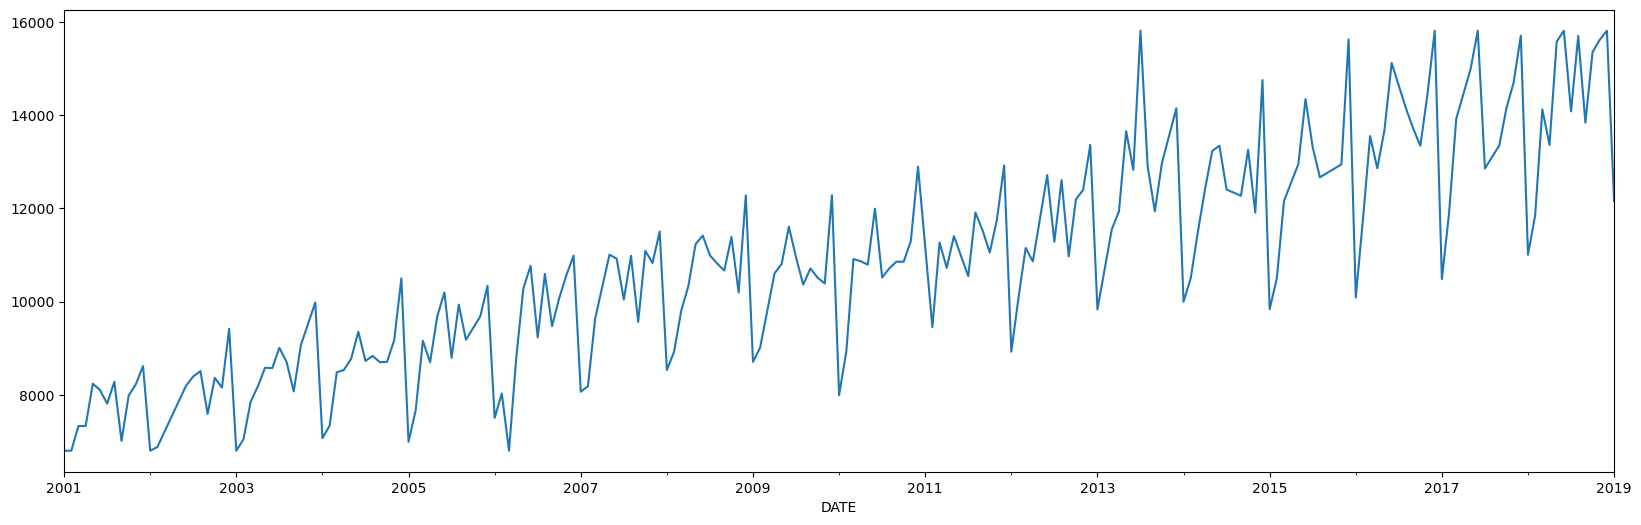

In [24]:
mobile_sales.Sales.plot()

#### Q : what kind of data it it? 

By observing the time series plot, we can now answer certain questions about the data:-

- Does it have a trend? Is it growing or decreasing?
    - We can see that the sales seem to be growing every year
- Is the brand making more revenue every year?
    - Yes

- Are there any repeating patterns?
    - There are repeating patterns
    - Some peaks and some minimas seem to be repeating themselves
    
#### Q. What do the repeating patterns indicate?

For our use case, we can say that perhaps around Februray the trend seems to be that sales drop down. But they seem to pick up around October-December, perhaps due to the festive season.


### Seperating out trend and seasonality

* Moving average

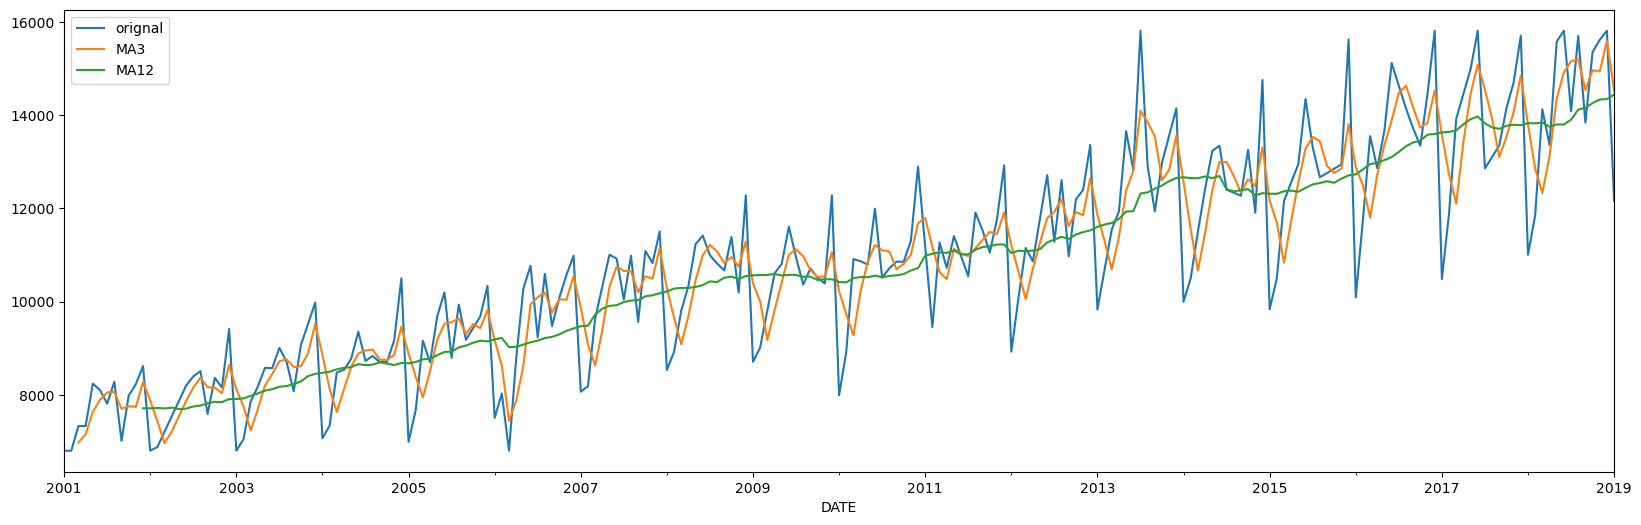

In [25]:
mobile_sales.Sales.plot(label='orignal')
mobile_sales.Sales.rolling(window=3).mean().plot(label='MA3')
mobile_sales.Sales.rolling(window=12).mean().plot(label='MA12')
plt.legend()

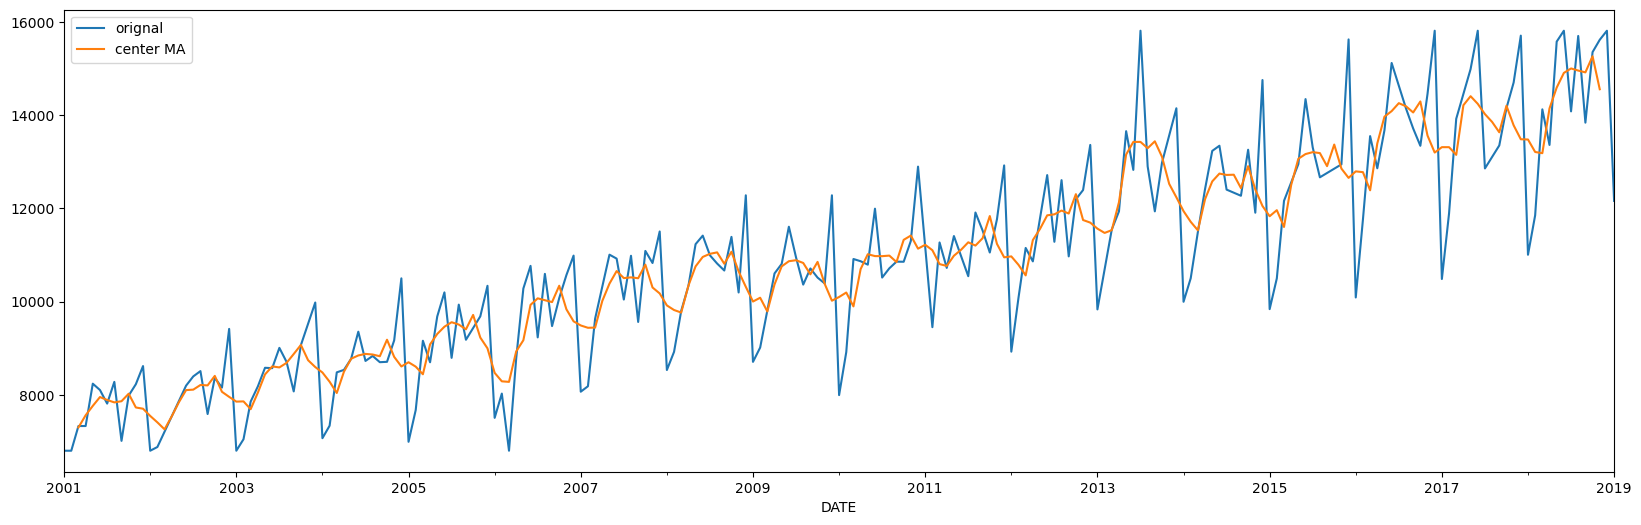

In [26]:
mobile_sales.Sales.plot(label='orignal')
mobile_sales.Sales.rolling(window=5, center=True).mean().plot(label='center MA')
plt.legend()

**Q. What observations can we make from this plot?**

- We can see that the smoothed series is **lagging**.
- Notice that both maximas and minimas are lagging by 3 units along x axis. This is because our rolling window was 3.
 - Benefit of this is, if the time series value changes suddenly, the smoothed series would change a few days/weeks/months later.
 - Thereby, adjusting to the new level.
- **Less-spikeym**
- Notice that there are some **missing values in the beginning**
 - This makes sense, since our `window size=3`, the very first MA value we can get is after 3 data points.

**Q. What if we take window size = 1?**

In this case, the smoothed series should be exactly same as the original time series.

---

## Trend

**Q. What is meant by trend in a time series?**

Trend can be thought of as the linear **increasing or decreasing behavior** of the series over a long period of time.

When we say that a time series is increasing or decreasing, we're actually talking about it's trend.

A trend can be:-
- Uptrend
- Downtrend
- Can be up and down, need not be a straight line




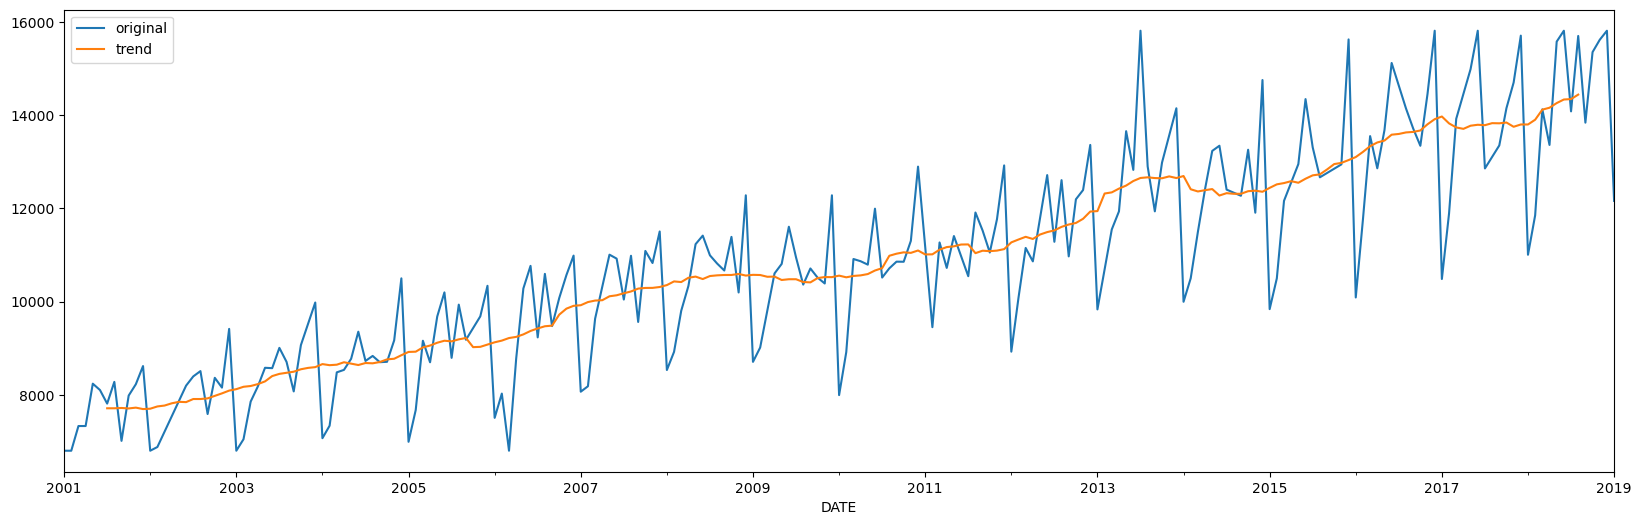

In [27]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='trend')

plt.legend()

### Time series Decomposition

In [28]:
import statsmodels.api as sm


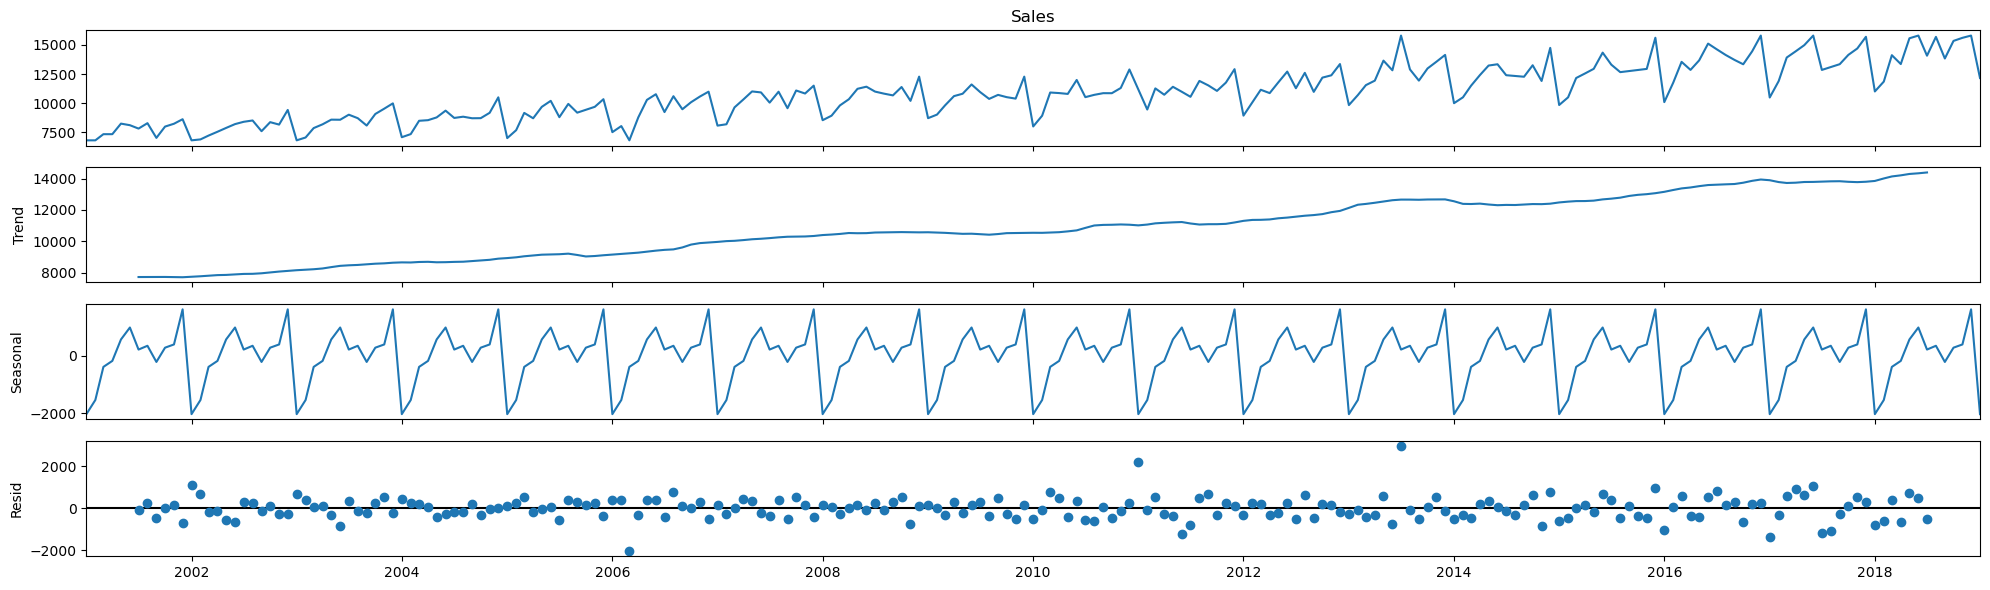

In [29]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')
model.plot();

Text(0.5, 1.0, 'histogram of residuals, should be mean centric ')

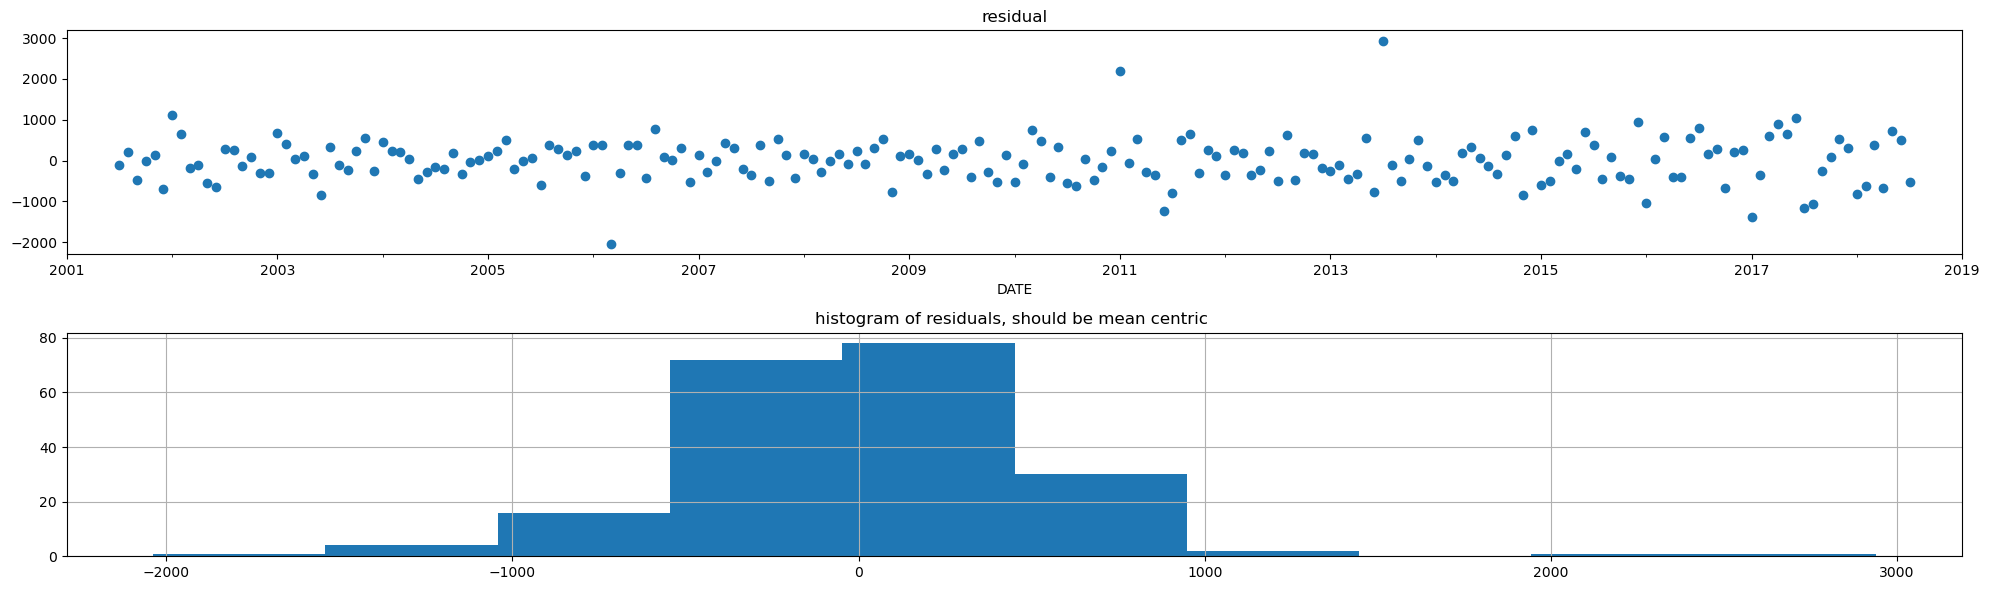

In [30]:
plt.figure(tight_layout=True)
plt.subplot(211)
model.resid.plot(style='o')
plt.title('residual')

plt.subplot(212)
model.resid.hist()
plt.title('histogram of residuals, should be mean centric ')

In [31]:
model.resid.mean()

-3.231641702976885

Decomposition from Scratch

<Axes: xlabel='DATE'>

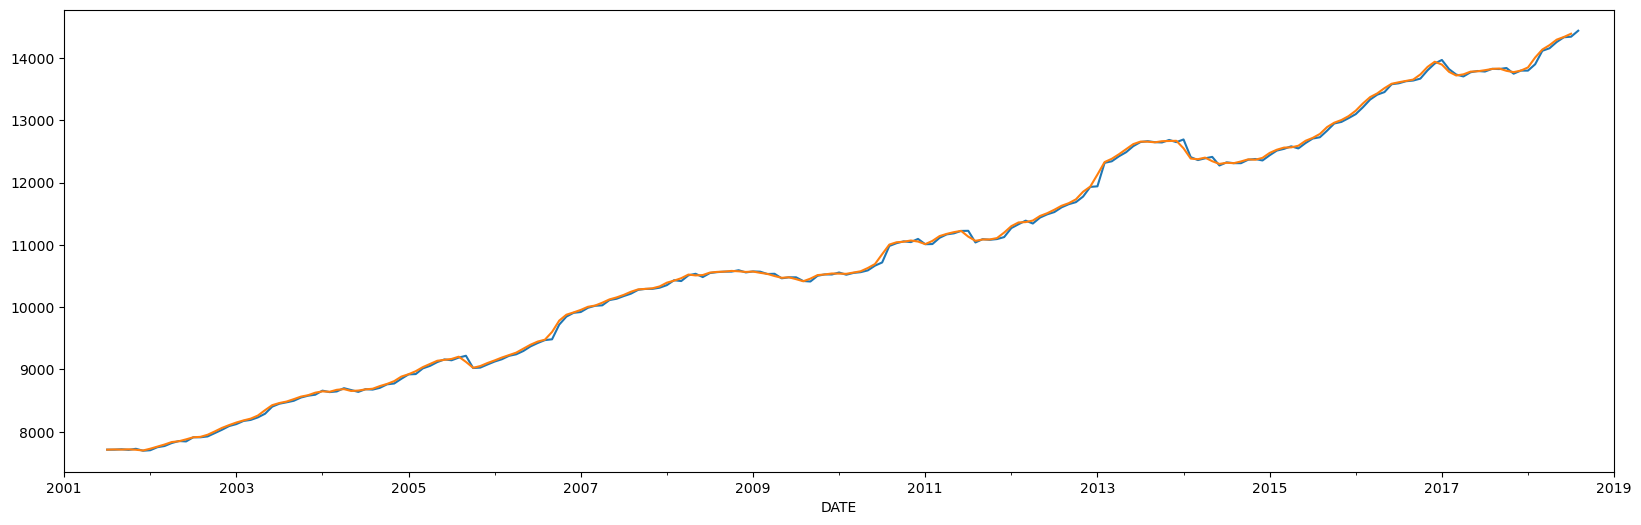

In [32]:
trend = mobile_sales.Sales.rolling(12, center=True).mean()
trend.plot()
model.trend.plot()

Text(0.5, 1.0, 'seasonality')

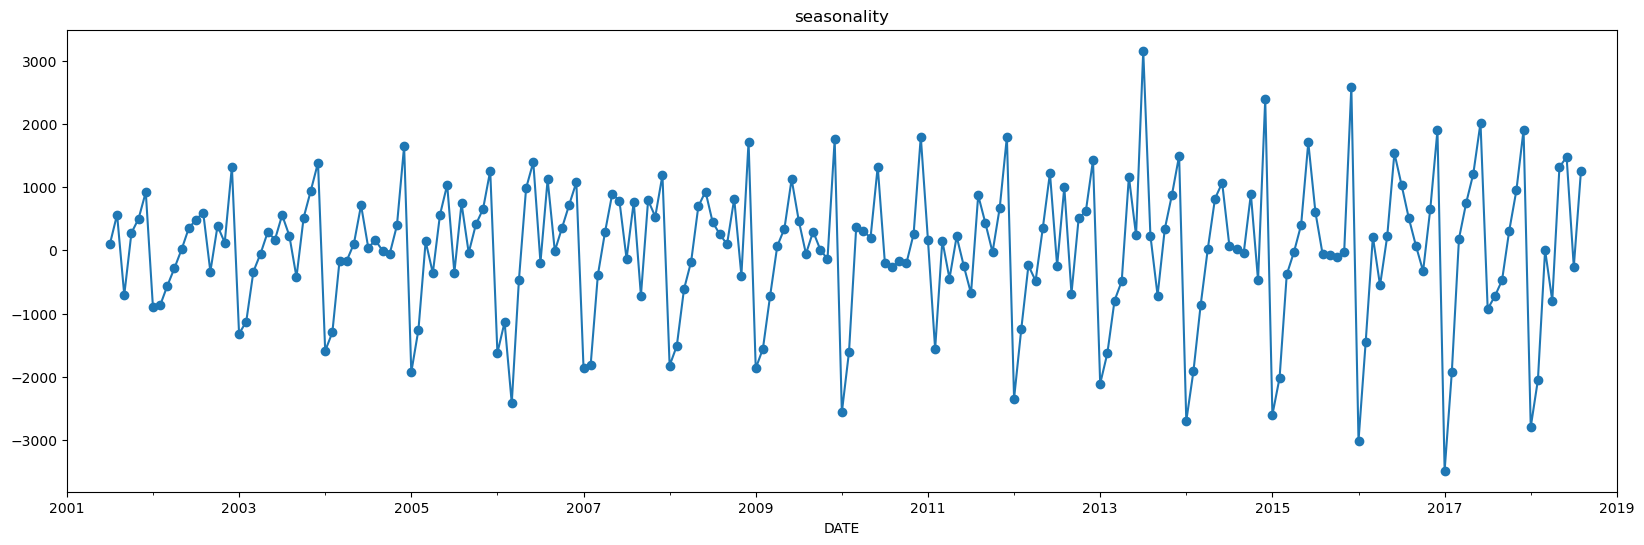

In [33]:
de_trend = mobile_sales.Sales - trend
de_trend.plot(style='-o')
plt.title('seasonality')

<Axes: xlabel='DATE'>

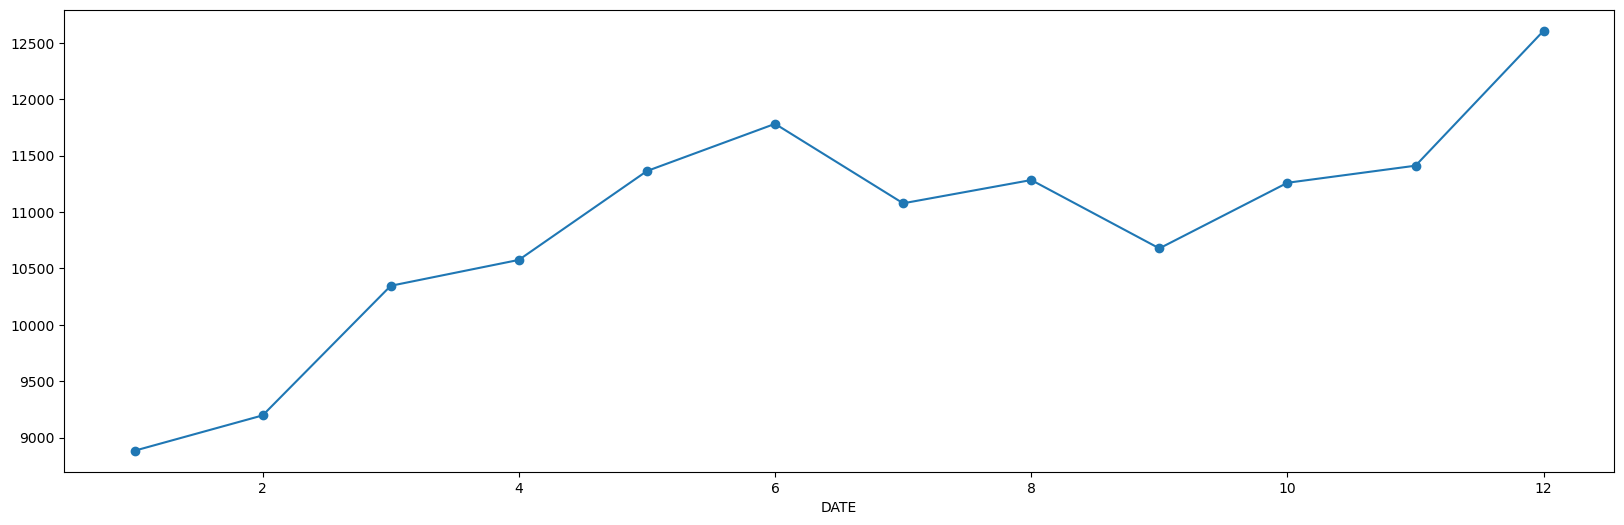

In [34]:
dtf = mobile_sales.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')



<Axes: xlabel='DATE'>

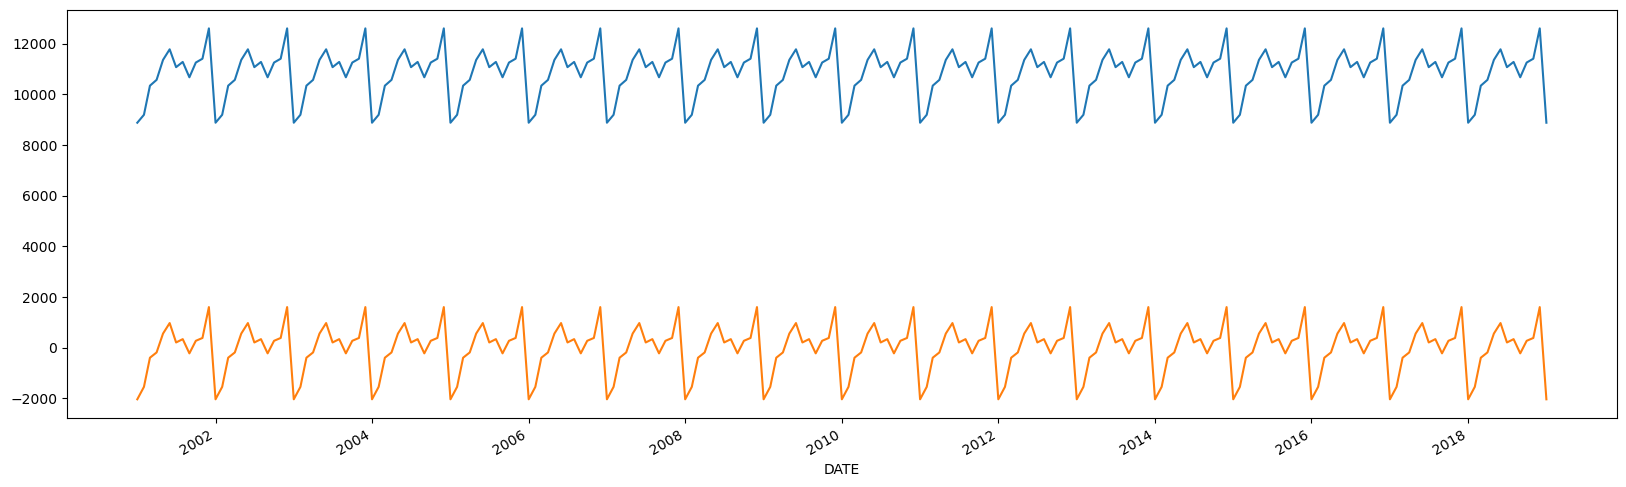

In [35]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

### Task-2: Generating Forecasts

Q. How can we obtain these splits?

In [36]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < train_max_date].copy()
test_x = mobile_sales.loc[mobile_sales.index >= train_max_date].copy()

train_x.shape, test_x.shape

((205, 1), (12, 1))

In [37]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))
    

### Simple Forecast Methods

In [38]:
# using mean model

train_x.Sales.mean()

10653.201951219511

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


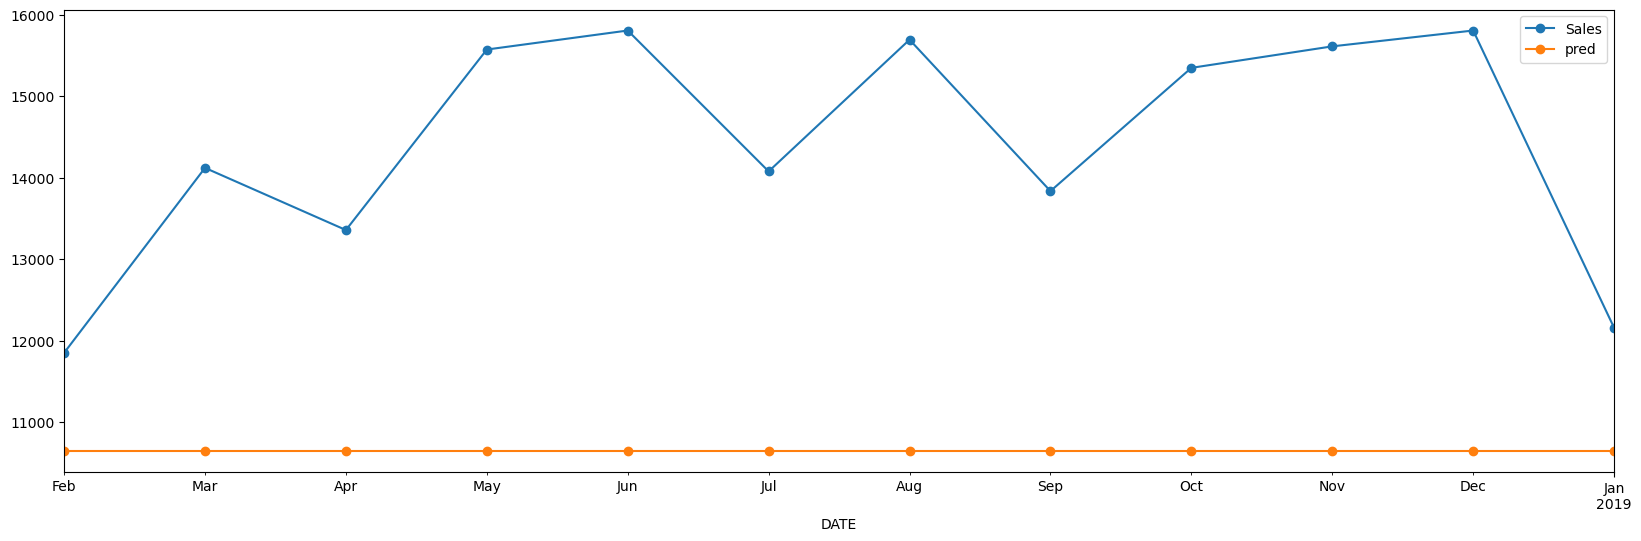

In [39]:
test_x['pred'] = train_x.Sales.mean()
test_x.plot(style='-o')
performance(test_x.Sales, test_x.pred)

2. Naive Approach

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


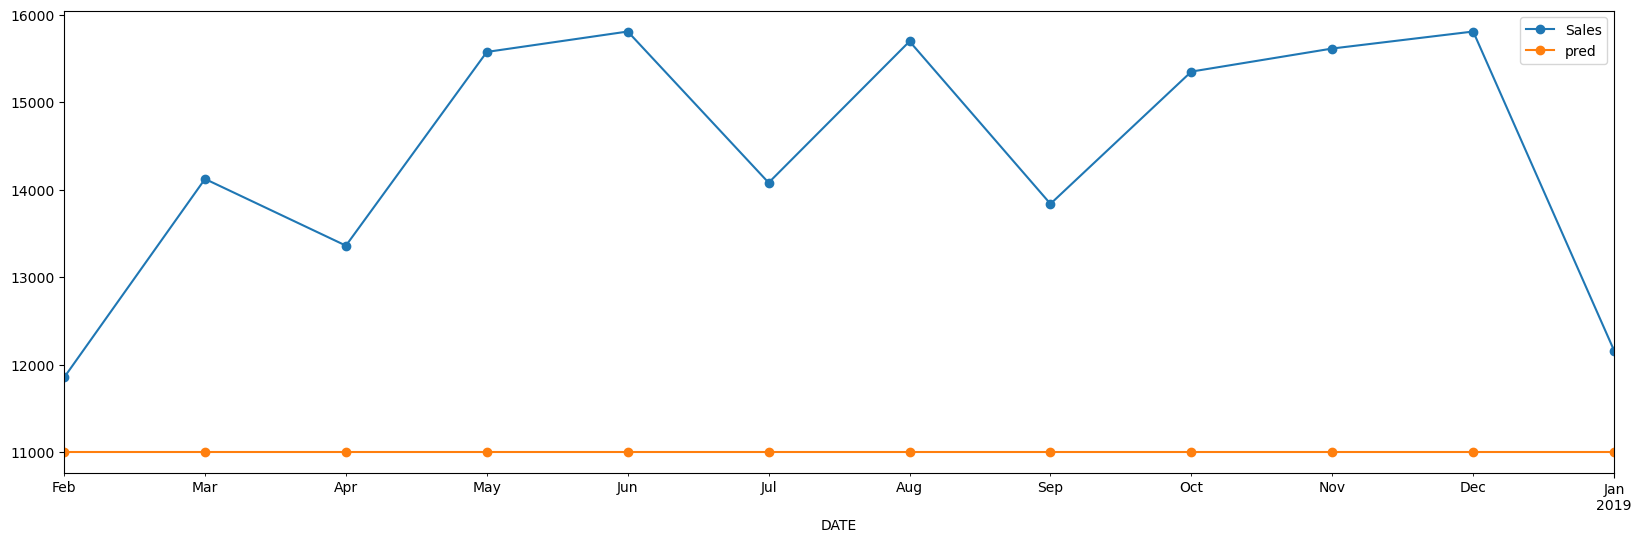

In [40]:
train_x.Sales[-1]

test_x['pred'] = train_x.Sales[-1]
test_x.plot(style='-o')
performance(test_x.Sales, test_x.pred)

This model's performance is slighly better, but we can see it's still really bad.

#### 3. Seasonal Naive Forecast

MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


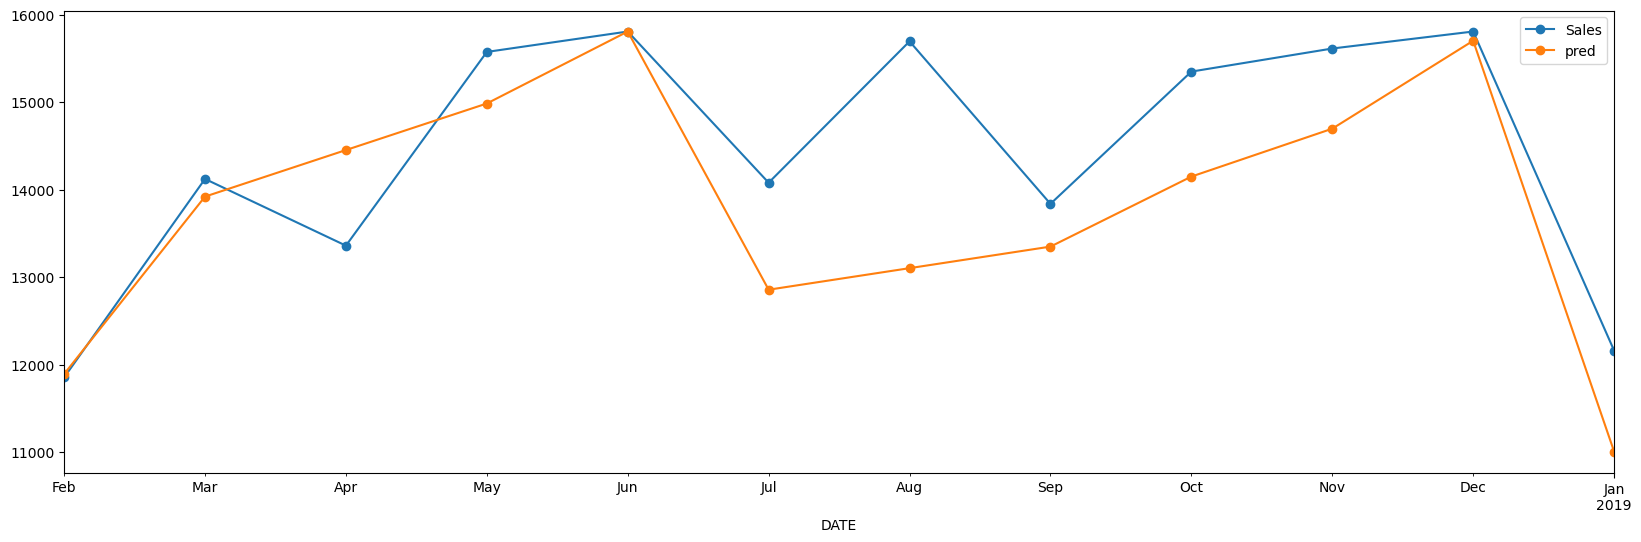

In [42]:
for i in test_x.index:
    test_x.loc[i]['pred']  = train_x.loc[i - pd.DateOffset(years=1)]['Sales']
    
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

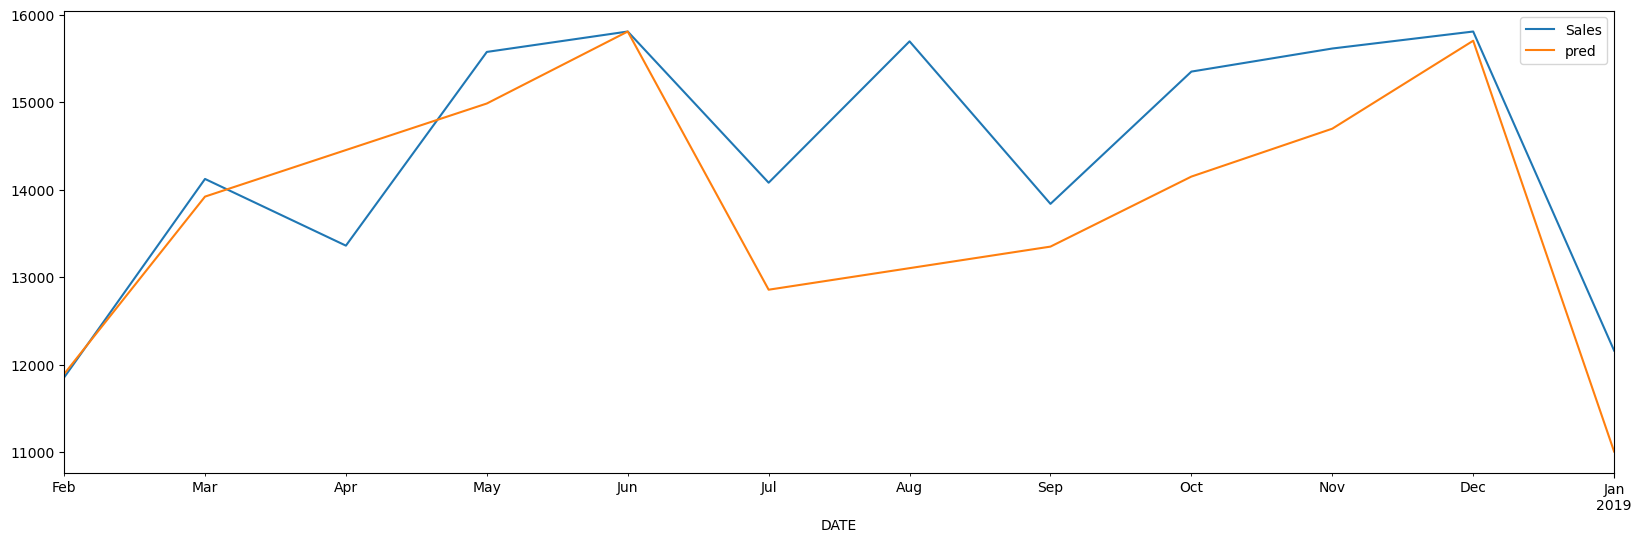

In [52]:
# Define the window size (e.g., 3 for a 3-period moving average)
window_size = 3

# Calculate the rolling mean
data['rolling_mean'] = data['sales_column'].rolling(window=window_size).mean()
